# UBER DATA ANALYSIS

1.In which category do people book the most Uber rides?

2.For which purpose do people book Uber rides the most?

3.At what time do people book cabs the most from Uber?

4.In which months do people book Uber rides less frequently?

5.On which days of the week do people book Uber rides the most?

6.How many miles do people usually book a cab for through Uber?

#### import librabries 

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#### load dataset

In [10]:
df = pd.read_csv("UberDataset.csv")

In [11]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
df.shape

(1156, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [15]:
df['PURPOSE'] = df['PURPOSE'].fillna('Not')

In [16]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### Data Preprocessing

##### convert START_DATE , END_DATE datatype to datetime format

In [18]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')
#errors='coerce': If there are invalid date formats, they will be replaced with NaT (Not a Time), instead of throwing an error.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


##### add date and time column seprately

In [20]:
from datetime import datetime

In [21]:
df['date'] = pd.DatetimeIndex(df['START_DATE']).date

In [22]:
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [23]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0


##### categorize time properly

In [24]:
df['day-night'] = pd.cut( df['time'] , bins = [0,10,15,19,24] , labels = ['Morning','Afternoon','Evning','Night'])

In [26]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


##### remove empty column 

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(413, 10)

# Data Visualization

##### 1.In which category do people book the most Uber rides?



##### 2.For which purpose do people book Uber rides the most?

<Axes: xlabel='count', ylabel='PURPOSE'>

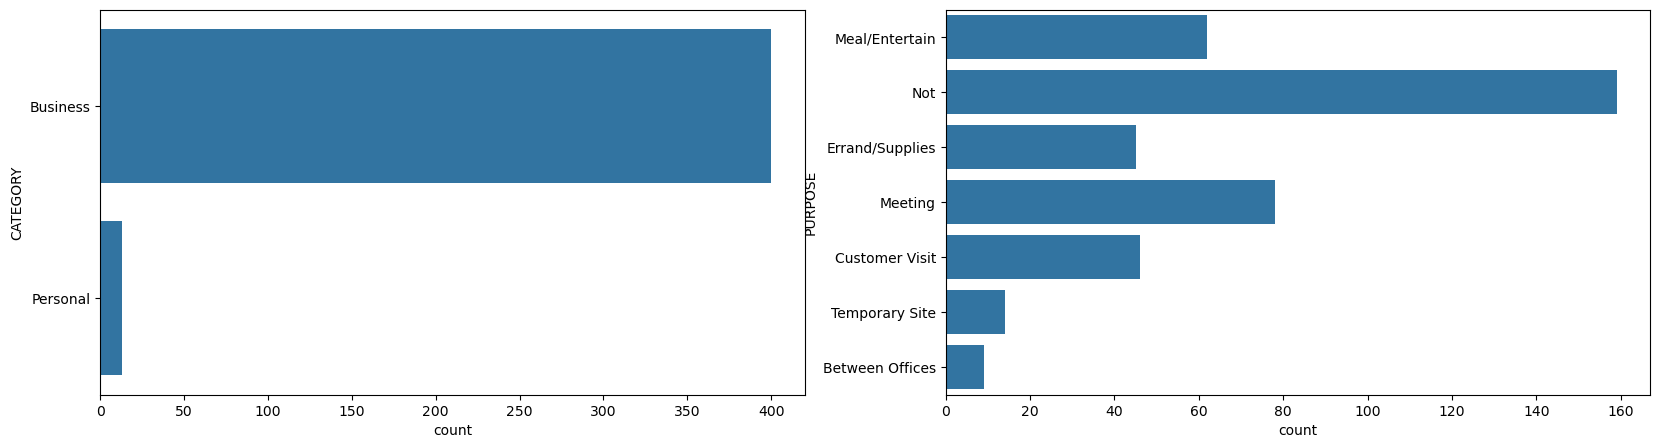

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])

##### 3.At what time do people book cabs the most from Uber?

<Axes: xlabel='count', ylabel='day-night'>

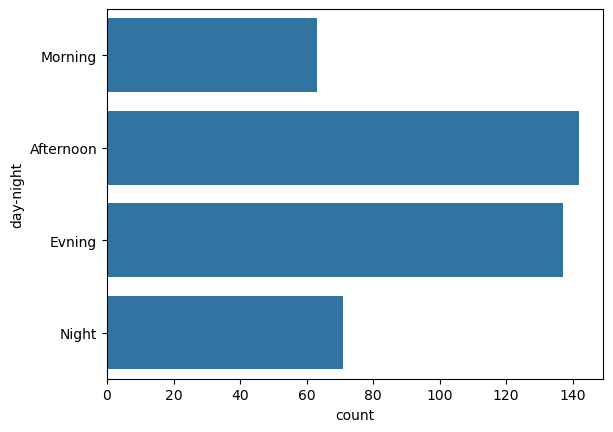

In [33]:
sns.countplot(df['day-night'])

##### 4.In which months do people book Uber rides less frequently?

In [39]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month
month_labels = {1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'June',
               7.0:'july',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'}
df['month'] = df['month'].map(month_labels)
mon = df['month'].value_counts(sort=False)

In [40]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evning,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [47]:
data = pd.DataFrame({"MONTHS":mon.values,
                     "VALUE_COUNT":df.groupby('month',sort=False)['MILES'].max()
                    })
data.head()

,MONTHS,VALUE_COUNT
month,,
Jan,23,63.7
Feb,40,23.3
Mar,42,17.3
Apr,24,174.2
May,26,25.6


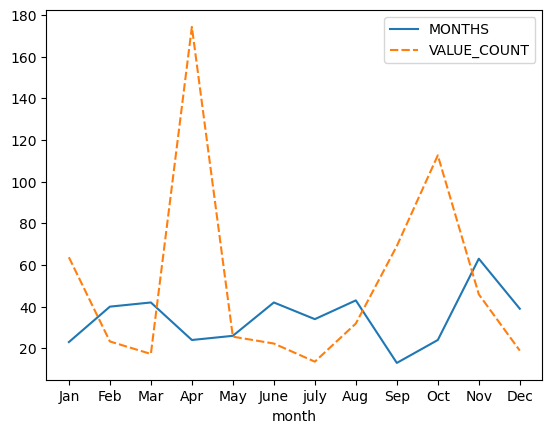

In [48]:
p = sns.lineplot(data=data)

##### 5.On which days of the week do people book Uber rides the most?

In [49]:
df['day'] = df['START_DATE'].dt.weekday
day_labels = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['day'] = df['day'].map(day_labels)

In [50]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evning,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


<Axes: xlabel='day', ylabel='count'>

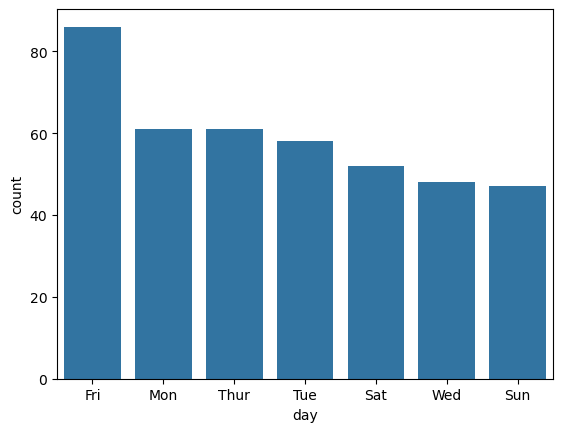

In [56]:
day_count = df['day'].value_counts()
sns.barplot(x=day_count.index,y=day_count)

##### 6.How many miles do people usually book a cab for through Uber?

C:\Users\Pritam -PC\AppData\Local\Temp\ipykernel_16420\1171915261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

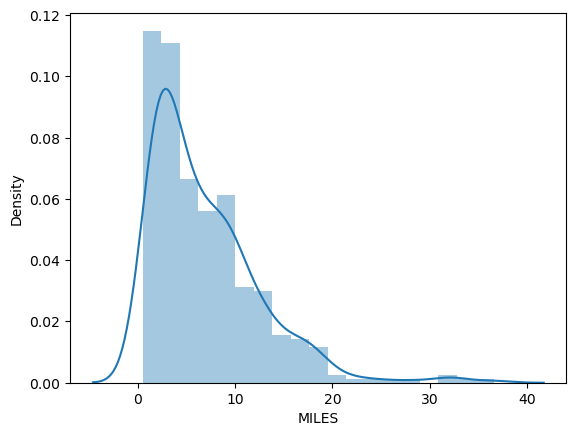

In [57]:
sns.distplot(df[df['MILES']<40]['MILES'])

### Conclusions